 ## Numerical information extraction from image data

For this lab, we are going to use a basic shapes file. You can download it [here](https://drive.google.com/file/d/1btB70ALZzjIalBDr8-SPDAlwGouNDnOM/view?usp=sharing). Once you have the file you should be able to display it with the code below

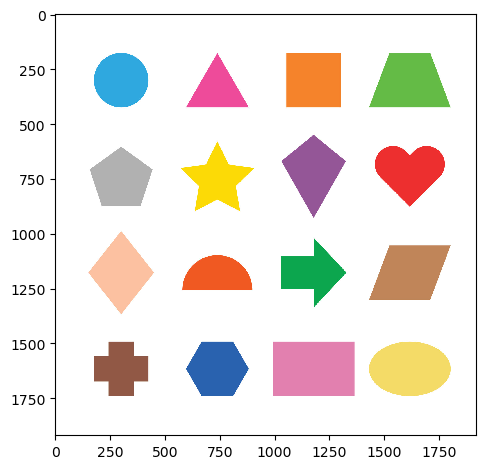

In [1]:
from skimage import io

shapes_image = io.imread('shapes.jpg')
io.imshow(shapes_image)

### Task 1 - Basic Measurements (5 marks)

For this task, we will try to extract different pieces of information from each shape. For example, area, perimeter and centroid. To do that, we will need to follow a series of steps.

**a)** Convert the image to grayscale (1 mark)

**b)** Identify a threshold to separate the images from the background. You can apply the [threshold_otsu](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu) method, but notice that it might not contain all the shapes. Try to work from it and identify a binary image that contains all the shapes (1 mark)

**c)** Using the [`measure.label`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) method, create a laballed image for your binary image in b). Note: you might need to use the `connectivity` parameter (1 mark)

**d)** Use the [`measure.regionprops`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) passing the labelled image. This method will return a iterable object, with information about each labelled region in the image. Check what are the attributes of each object. Print area, perimeter and centroid. (1 mark)

**e)** The label function won't return the labels in any specific order. To identify which shape corresponds to each region, use the centroid value again, and add the image number over the shape. A partial solution is given below. (1 mark)

In [ ]:
binary_image = "" # Replace that with the binary image in b)
label_image = "" # Replace that with the label image in c)

# Visualize the original binary image and the labeled image with label values
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original binary image
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')

# Labeled image with label values overlaid
axes[1].imshow(label_image, cmap='nipy_spectral')

# Annotate each labeled region with its label value
for region in measure.regionprops(label_image):
   
    # Get x, y values of the region centroid
    
    # Using the text method for axes, add the region.label to axes[1] in the centroid coordinates 


axes[1].set_title('Labeled Image with Label Values')

plt.tight_layout()
plt.show()

### Task 2 - Intensity Statistics (10 marks)

The mean intensity value of a single color channel provides information about the average brightness or intensity of that specific color within the image or a region of that image. The mean intensity value for a specific channel gives an average measure of the brightness of that color across the entire image. Let's have a look at intensity values for the previous shapes figure.

**a)** Note that in the original figure shapes have different colors. We are going to use `measure.regionprops` again to compute the mean and standard deviation intensity of pixel values for each region. You will need to do that for each color channel.

Hints: Use the `intensity_image` parameter of `regionprops` passing a image with a single color channel. To get a image with a single color channel you can slice the image for all rows and coluns, but a single color channel. Next, You can use the numpy methods `mean` and `std` to get the mean and std from the `intensity_image` attribute returned by regionprops object. (5 marks)

**b)** Plot three bar charts (one for each color channel) comparing the mean intensity of all shapes. You can create a list with all the mean intensity values to use in the plot. (5 marks)



### Task 3 - Histogram Analysis (10 marks)

Another way to evaluate pixel value information is by histograms.

**a)** Plot the histogram of pixel values in the red channel for each shape in the original image. We can use [exposure.histogram](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.histogram) method to extract the histogram array and bin centers of each histogram bin. (4 marks) 

**b)** After analysing the histograms in a), modify the original shapes image and keep only the shapes with high frequency of strong red values (pixels from 100 to 255 with higher frequency in the red color channel).

You can check if the sum of frequencies in the histogram from index 0 up to 100 is lower than the sum of frequencies for indexes from 101 until 255. If they are, extract the bounding box of the region, with the [bbox](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) property of the region, and set all pixel values in the region to 255 (in all color channels).

Show the original image without the shapes with low frequency of strong red values.

Hint: the histogram might not have indexes up to 255. (4 marks)

**c)** Filtering shapes by the frequency of strong red values, is just way one of analysing the image. This should allow to create other custom metrics and identify reagions of interest in an image. For example, the ratio of the area of a region to its bounding box area can provide insights into how "compact" or "spread out" each labeled region is. Play with the previous exercise and attempt any custom metric of interest. (2 marks)

### Task 4 - Report (5 marks)

Summarise the tasks you completed when working with the image file. Highlight any challenges faced and how you resolved them. Were there any skills or concepts more challenging and rewarding to learn in this lab?
